<a href="https://colab.research.google.com/github/mohammad-sagher/classfication/blob/main/clssficationhomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("student_depression_dataset.csv")

df.columns = [col.replace(" ", "_").lower().strip() for col in df.columns]


df["financial_stress"] = df["financial_stress"].apply(lambda x: x if x != "?" else df["financial_stress"].unique()[1]).astype("float")


cat_features = df.select_dtypes("object")
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.drop(columns="id", inplace=True)
X = df.drop(columns="depression")
y = df["depression"]


class_weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



In [ ]:
X.columns.tolist()

['gender',
 'age',
 'city',
 'profession',
 'academic_pressure',
 'work_pressure',
 'cgpa',
 'study_satisfaction',
 'job_satisfaction',
 'sleep_duration',
 'dietary_habits',
 'degree',
 'have_you_ever_had_suicidal_thoughts_?',
 'work/study_hours',
 'financial_stress',
 'family_history_of_mental_illness']

In [ ]:

# بناء نموذج Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),

    Dropout(0.2),
    Dense(1, activation='sigmoid')  # مخرج واحد لتصنيف ثنائي
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)




Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


977/977 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7769 - loss: 0.4670 - val_accuracy: 0.8479 - val_loss: 0.3455
Epoch 2/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8469 - loss: 0.3654 - val_accuracy: 0.8466 - val_loss: 0.3438
Epoch 3/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8391 - loss: 0.3746 - val_accuracy: 0.8472 - val_loss: 0.3430
Epoch 4/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8383 - loss: 0.3723 - val_accuracy: 0.8515 - val_loss: 0.3425
Epoch 5/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8494 - loss: 0.3569 - val_accuracy: 0.8500 - val_loss: 0.3417
Epoch 6/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8525 - loss: 0.3564 - val_accuracy: 0.8474 - val_loss: 0.3422
Epoch 7/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8524 - loss: 0.3559 - val_accuracy: 0.8461 - val_loss: 0.3428
Epoch 8/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8525 - loss: 0.3501 - val_accuracy: 0.8472 - val_

In [ ]:


y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")


262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.84
Precision: 0.85
Recall: 0.88


In [ ]:
# تثبيت ipywidgets إذا لم تكن موجودة
!pip install ipywidgets -q
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd
import numpy as np

# تعريف القيم الممكنة لكل حقل
gender_options = ['Male', 'Female']
city_options = ['Ludhiana', 'Patna', 'Kalyan', 'Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata', 'Pune']
profession_options = ['Student', 'Working Professional']
dietary_habits_options = ['Healthy', 'Moderate', 'Unhealthy']
sleep_options = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
degree_options = ['Class 12', 'B.Tech', 'BCA', 'MCA', 'M.Tech', 'MBA', 'PhD']
yes_no_options = ['Yes', 'No']

# إنشاء الواجهة التفاعلية
gender = widgets.Dropdown(options=gender_options, description='الجنس:')
age = widgets.FloatText(value=20.0, description='العمر:')
city = widgets.Dropdown(options=city_options, description='المدينة:')
profession = widgets.Dropdown(options=profession_options, description='المهنة:')
academic_pressure = widgets.FloatSlider(min=0, max=10, step=0.5, value=5.0, description='الضغط الأكاديمي:')
work_pressure = widgets.FloatSlider(min=0, max=10, step=0.5, value=0.0, description='ضغط العمل:')
cgpa = widgets.FloatSlider(min=0, max=10, step=0.01, value=7.0, description='المعدل التراكمي:')
study_satisfaction = widgets.FloatSlider(min=0, max=10, step=0.5, value=5.0, description='الرضا عن الدراسة:')
job_satisfaction = widgets.FloatSlider(min=0, max=10, step=0.5, value=0.0, description='الرضا الوظيفي:')
sleep_duration = widgets.Dropdown(options=sleep_options, description='مدة النوم:')
dietary_habits = widgets.Dropdown(options=dietary_habits_options, description='العادات الغذائية:')
degree = widgets.Dropdown(options=degree_options, description='الدرجة العلمية:')
suicidal_thoughts = widgets.Dropdown(options=yes_no_options, description='أفكار انتحارية:')
study_hours = widgets.FloatSlider(min=0, max=24, step=0.5, value=8.0, description='ساعات الدراسة/العمل:')
financial_stress = widgets.FloatSlider(min=1, max=10, step=0.5, value=5.0, description='الضغط المالي:')
family_history = widgets.Dropdown(options=yes_no_options, description='تاريخ عائلي للمرض النفسي:')

# إنشاء زر للتنبؤ
predict_button = widgets.Button(description='تنبأ بحالة الطالب')
output = widgets.Output()

# عرض الواجهة
display(HTML('<h2 style="text-align: center; color: #4285F4;">نموذج التنبؤ بالاكتئاب لدى الطلاب</h2>'))
display(HTML('<h3 style="text-align: center;">أدخل بيانات الطالب</h3>'))

left_panel = widgets.VBox([gender, age, city, profession, academic_pressure, work_pressure, cgpa, study_satisfaction])
right_panel = widgets.VBox([job_satisfaction, sleep_duration, dietary_habits, degree, suicidal_thoughts, study_hours, financial_stress, family_history])
form_panel = widgets.HBox([left_panel, right_panel])

display(form_panel)
display(predict_button)
display(output)

# وظيفة للتنبؤ
def on_button_clicked(b):
    with output:
        output.clear_output()
        print("جاري التنبؤ...")

        # إنشاء إطار بيانات جديد للطالب
        new_student = {
            'gender': gender_options.index(gender.value),
            'age': age.value,
            'city': city_options.index(city.value) if city.value in city_options else 0,
            'profession': profession_options.index(profession.value),
            'academic_pressure': academic_pressure.value,
            'work_pressure': work_pressure.value,
            'cgpa': cgpa.value,
            'study_satisfaction': study_satisfaction.value,
            'job_satisfaction': job_satisfaction.value,
            'sleep_duration': sleep_options.index(sleep_duration.value),
            'dietary_habits': dietary_habits_options.index(dietary_habits.value),
            'degree': degree_options.index(degree.value),
            'have_you_ever_had_suicidal_thoughts_?': yes_no_options.index(suicidal_thoughts.value),
            'work/study_hours': study_hours.value,
            'financial_stress': financial_stress.value,
            'family_history_of_mental_illness': yes_no_options.index(family_history.value)
        }

        # تحويل إلى DataFrame
        new_student_df = pd.DataFrame([new_student])

        # تطبيع البيانات باستخدام نفس المعاملات المستخدمة في التدريب
        new_student_scaled = scaler.transform(new_student_df)

        # التنبؤ
        prediction_prob = model.predict(new_student_scaled)[0][0]
        prediction = "مكتئب" if prediction_prob > 0.5 else "غير مكتئب"

        # عرض النتيجة
        if prediction == "مكتئب":
            display(HTML(f'<div style="background-color: #FFEBEE; padding: 15px; border-radius: 10px; text-align: center;">'
                         f'<h3>النتيجة: <span style="color: #D32F2F;">{prediction}</span></h3>'

                         f'<p>يرجى ملاحظة أن هذا التقييم ليس تشخيصًا طبيًا. إذا كنت تشعر بالقلق، يرجى استشارة متخصص في الصحة النفسية.</p>'
                         f'</div>'))
        else:
            display(HTML(f'<div style="background-color: #E8F5E9; padding: 15px; border-radius: 10px; text-align: center;">'
                         f'<h3>النتيجة: <span style="color: #388E3C;">{prediction}</span></h3>'

                         f'<p>يرجى ملاحظة أن هذا التقييم ليس تشخيصًا طبيًا. إذا كنت تشعر بالقلق، يرجى استشارة متخصص في الصحة النفسية.</p>'
                         f'</div>'))

# تسجيل وظيفة الزر
predict_button.on_click(on_button_clicked)

# لتجنب مشاكل العرض، يمكنك إضافة هذا الكود
from IPython.display import clear_output
clear_output(wait=True)

# ثم إعادة عرض الواجهة
display(HTML('<h2 style="text-align: center; color: #4285F4;">نموذج التنبؤ بالاكتئاب لدى الطلاب</h2>'))
display(HTML('<h3 style="text-align: center;">أدخل بيانات الطالب</h3>'))
display(form_panel)
display(predict_button)
display(output)

Button(description='تنبأ بحالة الطالب', style=ButtonStyle())

Output()

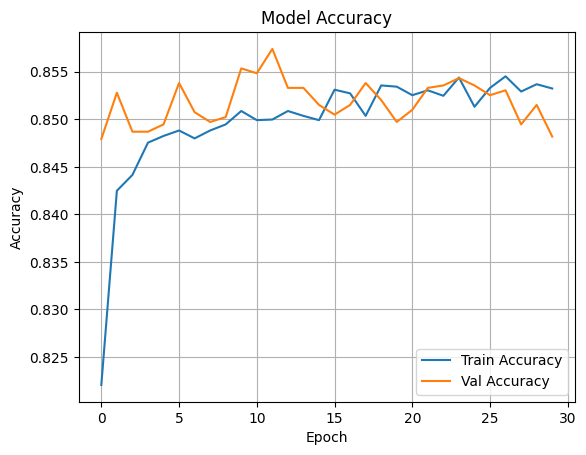

In [ ]:




import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


